# STA 6543: Predictive Modeing
# Project 

Name:

    Angel Manuel Perez

# Background
## A national veterans’ organization wishes to develop a predictive model to improve the cost-effectiveness of their direct marketing campaign. The organization, with its in-house database of over 13 million donors, is one of the largest direct-mail fundraisers in the United States. According to their recent mailing records, the overall response rate is 5.1%. Out of those who responded (donated), the average donation is `$13.00.` Each mailing, which includes a gift of personalized address labels and assortments of cards and envelopes, costs $0.68 to produce and send. Using these facts, we take a sample of this dataset to develop a classification model that can effectively capture donors so that the expected net profit is maximized. Weighted sampling was used, under-representing the non-responders so that the sample has equal numbers of donors and non-donors.

# Data
## The fundraising training file Download fundraising training file contains 3,000 records with approximately 50% donors (target = Donor) and 50% non-donors (target = No Donor).

# Step 1: 
## Partitioning. You might think about how to estimate the out of sample error. Either partition the dataset into 80% training and 20% validation or use cross validation (set the seed to 12345).

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(12345)
# Load the dataset
data = pd.read_csv("data/fundraising.csv")
data.head()

,zipconvert2,zipconvert3,zipconvert4,zipconvert5,homeowner,num_child,income,female,wealth,home_value,...,avg_fam_inc,pct_lt15k,num_prom,lifetime_gifts,largest_gift,last_gift,months_since_donate,time_lag,avg_gift,target
0,Yes,No,No,No,Yes,1,1,No,7,698,...,463,4,46,94.0,12.0,12.0,34,6,9.400000,Donor
1,No,No,No,Yes,No,2,5,Yes,8,828,...,376,13,32,30.0,10.0,5.0,29,7,4.285714,Donor
2,No,No,No,Yes,Yes,1,3,No,4,1471,...,546,4,94,177.0,10.0,8.0,30,3,7.080000,No Donor
3,No,Yes,No,No,Yes,1,4,No,8,547,...,432,7,20,23.0,11.0,11.0,30,6,7.666667,No Donor
4,No,Yes,No,No,Yes,1,4,Yes,8,482,...,275,28,38,73.0,10.0,10.0,31,3,7.300000,Donor


In [8]:
# Split features and target variable
X = data.drop(columns=['target'])
y = data['target']

# Partitioning into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12345)

# Alternatively, you can use cross-validation
# from sklearn.model_selection import cross_val_score
# cv_scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
# print("Cross-validation scores:", cv_scores)

# Now you have X_train, X_val, y_train, and y_val for training and validation


assignment 3 number 14

# Step 2: 
## Model Building. Follow the following steps to build, evaluate, and choose a model.

### 1. Exploratory data analysis. Examine the predictors and evaluate their association with the response variable. Which might be good candidate predictors? Are any collinear with each other?

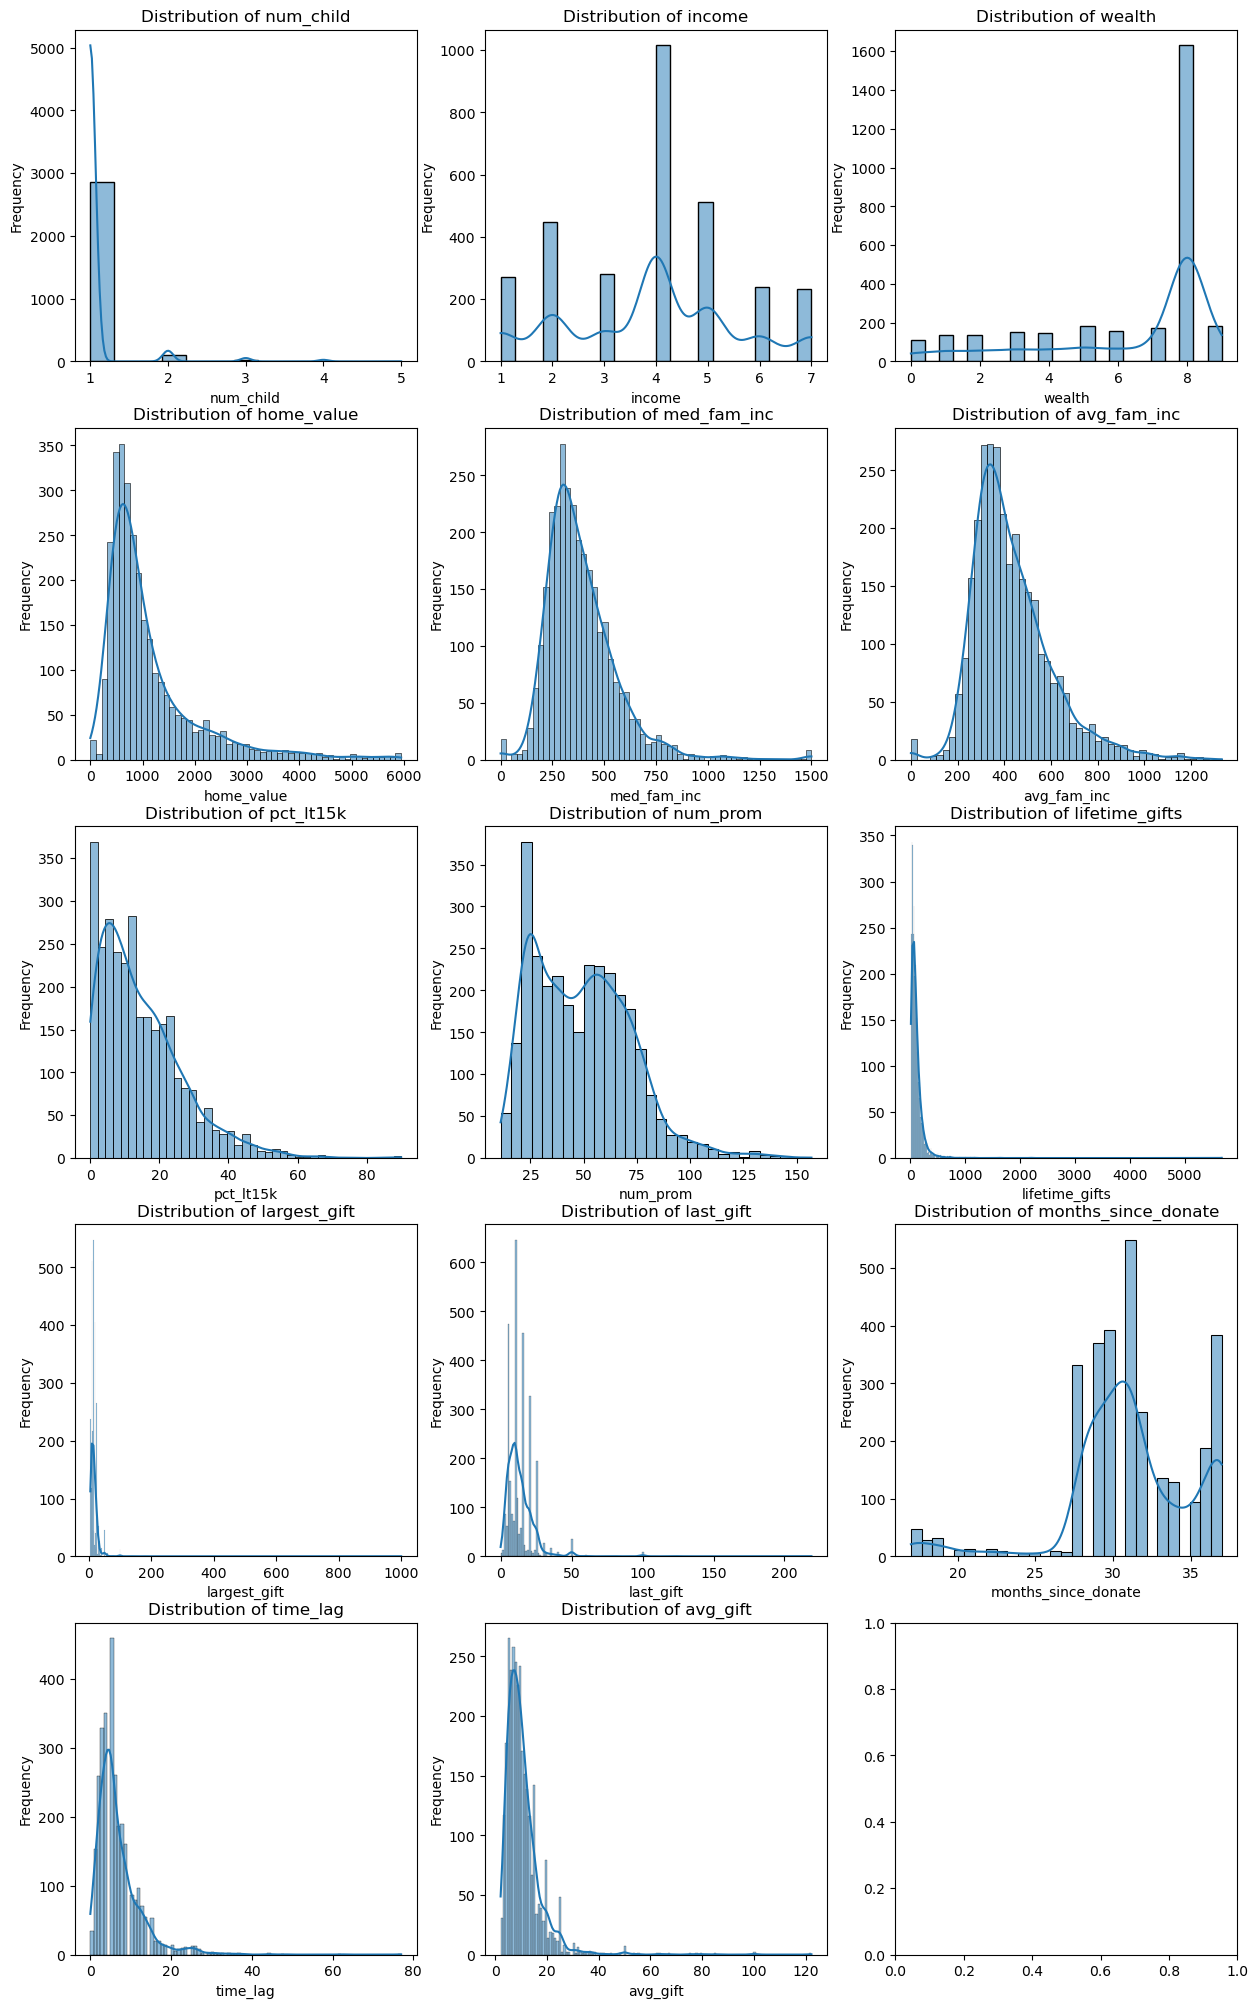

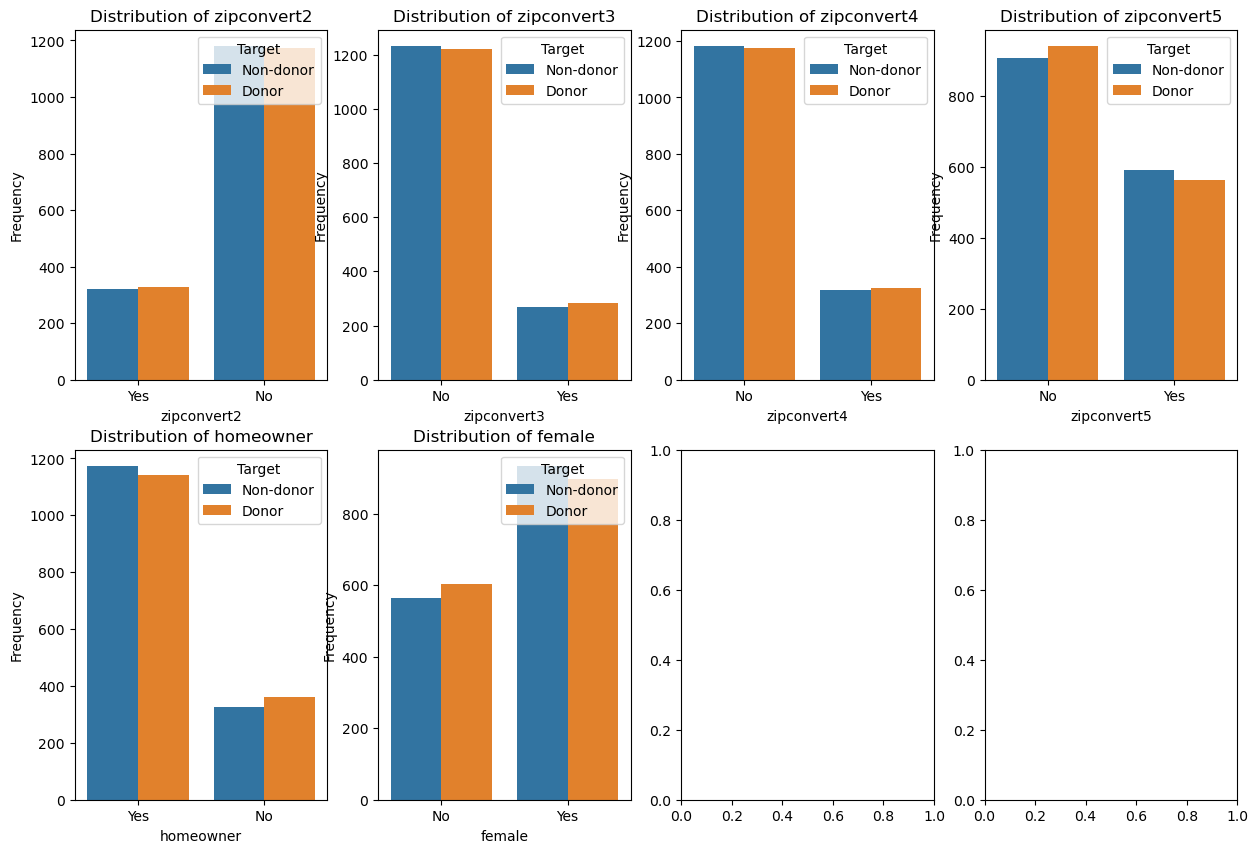

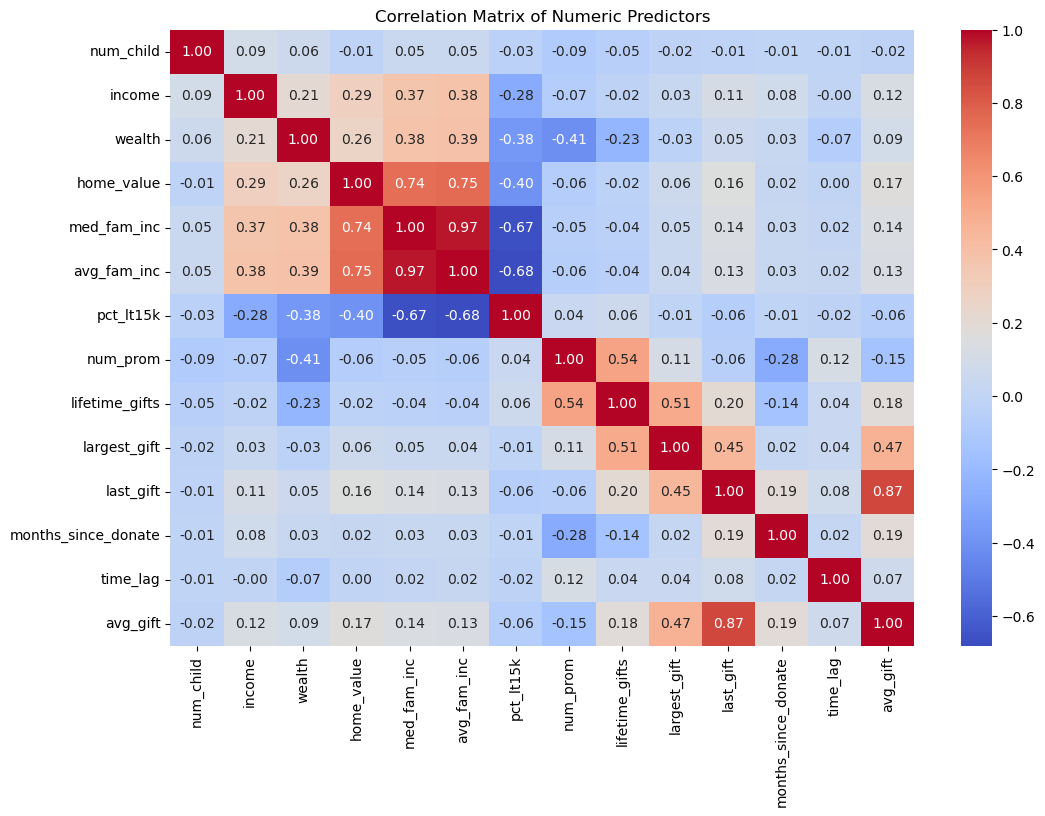

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("data/fundraising.csv")

# List of predictors
numeric_predictors = ['num_child', 'income', 'wealth', 'home_value', 'med_fam_inc', 'avg_fam_inc', 'pct_lt15k',
                      'num_prom', 'lifetime_gifts', 'largest_gift', 'last_gift', 'months_since_donate', 'time_lag', 'avg_gift']
categorical_predictors = ['zipconvert2', 'zipconvert3', 'zipconvert4', 'zipconvert5', 'homeowner', 'female']

# Arrange plots in rows of 3 or 4
def plot_in_rows(predictors, ncols=3):
    nrows = (len(predictors) + ncols - 1) // ncols
    fig, axes = plt.subplots(nrows, ncols, figsize=(15, 5 * nrows))
    axes = axes.flatten()
    for i, predictor in enumerate(predictors):
        ax = axes[i]
        if predictor in numeric_predictors:
            sns.histplot(data[predictor], kde=True, ax=ax)
        else:
            sns.countplot(x=predictor, hue='target', data=data, ax=ax)
            ax.legend(title='Target', loc='upper right', labels=['Non-donor', 'Donor'])
        ax.set_title(f'Distribution of {predictor}')
        ax.set_xlabel(predictor)
        ax.set_ylabel('Frequency')

# Plot numeric predictors
plot_in_rows(numeric_predictors)

# Plot categorical predictors
plot_in_rows(categorical_predictors, ncols=4)

# Correlation analysis
correlation_matrix = data[numeric_predictors].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Predictors')
plt.show()


### 2. Select classification tool and parameters. Run at least two classification models of your choosing. Describe the two models that you chose, with sufficient detail (method, parameters, variables, etc.) so that it can be reproduced.

### 3. Classification under asymmetric response and cost. Comment on the reasoning behind using weighted sampling to produce a training set with equal numbers of donors and non-donors? Why not use a simple random sample from the original dataset?

### 4. Evaluate the fit. Examine the out of sample error for your models. Use tables or graphs to display your results. Is there a model that dominates?

### 5. Select best model. From your answer in (4), what do you think is the “best” model?